In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import datetime

# Load data from CSV
data = pd.read_csv("filled_data.csv",parse_dates=['Date'])


2024-03-21 06:46:50.917366: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 06:46:50.920480: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 06:46:50.956451: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-03-21 06:46:51.993021: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# pip install pandas numpy tensorflow keras scikit-learn


In [3]:
data["Date"]=pd.to_datetime(data['Date'],dayfirst=True)

In [4]:
train=data[data['Date']<'2019-01-01']
test=data[data['Date']>='2019-01-01']

In [5]:
train.shape

(5479, 9)

In [6]:
test.shape

(365, 9)

In [7]:
features = [
    "Modal Price (Rs./Quintal)",
    "Rel Humidity at 2 Meters (%) ",
    "Precipitation Corrected (mm/day) ",
    "Surface Soil Wetness",
    "Root Zone Soil Wetness",
    "Temperature at 2 Meters",
]
target = "Modal Price (Rs./Quintal)"

In [8]:
# python -m pip install flask

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler=MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(train[features])
y_train=target_scaler.fit_transform(np.array(train[target]).reshape(-1, 1))

In [10]:
X_test=scaler.transform(test[features])
y_test=target_scaler.transform(np.array(test[target]).reshape(-1,1))

In [11]:
X_test.shape

(365, 6)

In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i : (i + look_back), :])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


look_back = 60  # Adjust this based on your data and experiment

X_train_seq, y_train_seq = create_sequences(X_train, look_back)
X_test_seq, y_test_seq = create_sequences(X_test, look_back)

# Define and train the LSTM model
model = Sequential()
model.add(
    LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]))
)  # Adjust units (50) based on your data and experiment
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_data=(X_test_seq, y_test_seq))

# Make predictions on test data
y_pred = model.predict(X_test_seq)



Epoch 1/20


/opt/hostedtoolcache/Python/3.12.2/x64/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5:52 2s/step - loss: 0.2139

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1842

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1550

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1364

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1236

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1134

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1054

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0986

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0928

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0877

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0833

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0793

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0757

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0724

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0695

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0668

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0644

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0621

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0600

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0581

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0563

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0546

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0530

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0516

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0502

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0489

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0477

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0465

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0454

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0444

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0434

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0425

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0416

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0408

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0399

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0392

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0384

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0377

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0370

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0364

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0358

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0352

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0346

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0340

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0335

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0330

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0325

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0320

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0315

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0311

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0306

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0302

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0298

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0294

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0290

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0286

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0283

170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0280 - val_loss: 0.0030


Epoch 2/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 4.9210e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.9337e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.2985e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.6528e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.7625e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.8522e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.8743e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.8734e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.8781e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.8985e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.9070e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.9093e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.9141e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.9164e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.9270e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.9348e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.9515e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.9653e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.9745e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.9792e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.9836e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.9897e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.9928e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.9933e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6.0006e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6.0129e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6.0206e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0306e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0398e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0479e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0548e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0614e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0657e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0679e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0734e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0771e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0820e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0859e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0885e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0905e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0932e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0959e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0982e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.1000e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.1006e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.1003e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.1007e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.1015e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.1021e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.1021e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.1011e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.1000e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0991e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0978e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0971e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0960e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0953e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 6.0951e-04 - val_loss: 9.8925e-04


Epoch 3/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0011

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0010

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 9.5223e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 9.3146e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 9.0177e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 8.8083e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 8.6448e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 8.4880e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 8.3378e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 8.2004e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 8.0697e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 7.9363e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.8081e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.7015e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.6240e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.5573e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.4959e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.4339e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.3778e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.3259e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.2743e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.2243e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.1768e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.1316e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.0912e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.0503e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.0094e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.9692e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.9304e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.8939e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.8578e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.8226e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.7893e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.7559e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.7238e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.6929e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.6629e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.6327e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.6026e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.5755e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.5501e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.5260e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.5022e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.4791e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.4578e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.4373e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.4174e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.3983e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.3792e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.3611e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.3433e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.3264e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.3115e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.2983e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.2853e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.2727e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.2607e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 6.2538e-04 - val_loss: 0.0010


Epoch 4/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.6295e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.0768e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.6082e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.8843e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.0911e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.1418e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.1107e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.0678e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.0115e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.9428e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.8884e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.8260e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7823e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7585e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7439e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7361e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7290e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7128e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.6954e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.6797e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.6616e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.6425e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.6250e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.6069e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.5895e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.5719e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.5521e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.5310e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.5104e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.4902e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.4697e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.4495e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.4293e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.4105e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3931e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3762e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3589e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3419e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3261e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3106e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.2952e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.2802e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.2662e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.2531e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.2430e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.2334e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.2253e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.2186e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.2125e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.2063e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.1999e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.1950e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.1917e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.1897e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.1874e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.1852e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.1828e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 5.1812e-04 - val_loss: 8.0364e-04


Epoch 5/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.2495e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.0436e-04

  6/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.4280e-04

  9/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 5.5583e-04

 12/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.5975e-04

 15/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.5655e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.5126e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.5571e-04

 24/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.5497e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.5285e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.5085e-04

 33/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.4809e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.4487e-04

 39/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.4245e-04

 42/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.3925e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.3796e-04

 48/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.3621e-04

 51/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.3438e-04

 54/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.3235e-04

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.3028e-04

 60/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2834e-04

 63/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2642e-04

 66/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2445e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2251e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2076e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1910e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1772e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.1655e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.1541e-04

 87/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.1425e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.1307e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.1199e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.1105e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.1000e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.0898e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.0802e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.0707e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.0621e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.0535e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.0442e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.0347e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.0248e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.0142e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.0070e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9998e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9895e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9802e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9735e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9671e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9603e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9530e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9453e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9374e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9292e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9213e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9134e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9056e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.8978e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4.8927e-04 - val_loss: 8.1491e-04


Epoch 6/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 1.0009e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4736e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.7888e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9613e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0726e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1507e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2179e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2457e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2654e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2786e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2879e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2891e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3033e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3101e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3147e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3194e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3231e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3268e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3303e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3336e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3373e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3451e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3539e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3622e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3706e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3779e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3837e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3876e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3903e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3927e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3957e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3981e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4006e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4075e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4142e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4209e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4279e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4360e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4437e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4508e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4577e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4640e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4688e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4732e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4780e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4834e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4883e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4925e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4959e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4996e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5037e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5079e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5125e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5167e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5205e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5240e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5272e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.5293e-04 - val_loss: 9.3265e-04


Epoch 7/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.8311e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2753e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6691e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7958e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8921e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9886e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0257e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0976e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1351e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1522e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1584e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1634e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1770e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1851e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1926e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1998e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2105e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2202e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2329e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2404e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2467e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2519e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2560e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2607e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2643e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2668e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2708e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2743e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2791e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2834e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2871e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2908e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2947e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2989e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3023e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3056e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3114e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3171e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3234e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3306e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3378e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3444e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3507e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3574e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3650e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3730e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3816e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3898e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3975e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4070e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4172e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4281e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4391e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4501e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4605e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4707e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4807e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.4871e-04 - val_loss: 0.0019


Epoch 8/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 8.3557e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.8983e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.5278e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.3769e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.1901e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.0273e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.9080e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.8427e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.7512e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.6556e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.5663e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.4816e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.3977e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.3188e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2421e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1716e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1044e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.0465e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.9936e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.9420e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.8922e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.8444e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.8049e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7723e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7411e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7097e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.6785e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6498e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6239e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.5999e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.5763e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.5540e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.5318e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.5098e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.4896e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.4700e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.4517e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.4337e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.4180e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.4038e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.3931e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.3842e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.3753e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.3670e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.3589e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.3508e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.3430e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.3350e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.3268e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.3188e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.3105e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.3022e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2937e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2852e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2771e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2694e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2619e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4.2569e-04 - val_loss: 9.4983e-04


Epoch 9/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 3.1166e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.7515e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8248e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0225e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1729e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2896e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3640e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3974e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4179e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4265e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4416e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4661e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4900e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5169e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5421e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5710e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5934e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6135e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6303e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6446e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6586e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6714e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6825e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6924e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7018e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7099e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7186e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7271e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7356e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7435e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7485e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7514e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7538e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7556e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7563e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7582e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7608e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7629e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7644e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7645e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7633e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7612e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7587e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7566e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7565e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7566e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7558e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7544e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7539e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7528e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7510e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7490e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7467e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7444e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7425e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7403e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7385e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.7372e-04 - val_loss: 5.3000e-04


Epoch 10/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.7701e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.3280e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.3198e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.3036e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.3215e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.3986e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4679e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5128e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5533e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5791e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6013e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6175e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6294e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6342e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6363e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6445e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6570e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6721e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6912e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7121e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7346e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7588e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7849e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8109e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8357e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8608e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8865e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9124e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9371e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9606e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9864e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0146e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0418e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0670e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0916e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1143e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1353e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1542e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1708e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1855e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1985e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2103e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2212e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2312e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2398e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2479e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2557e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2628e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2691e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2751e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2806e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2857e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2905e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2950e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2991e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3028e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3061e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.3081e-04 - val_loss: 6.1552e-04


Epoch 11/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.0128e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6901e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9041e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0184e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0331e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0281e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0376e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0786e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1280e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1613e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1904e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2117e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2213e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2423e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2555e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2654e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2709e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2708e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2685e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2642e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2606e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2541e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2465e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2411e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2369e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2335e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2329e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2319e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2303e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2289e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2274e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2268e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2269e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2280e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2296e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2314e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2331e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2341e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2350e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2359e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2366e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2368e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2367e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2366e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2362e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2352e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2341e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2323e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2302e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2280e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2266e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2254e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2245e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2235e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2225e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2211e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2199e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.2193e-04 - val_loss: 5.1092e-04


Epoch 12/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 3.0094e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.7387e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6933e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6692e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6279e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.5644e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.5890e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6672e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.7215e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.7448e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.7520e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.7496e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7520e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7596e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7643e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7637e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7596e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7550e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7530e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7496e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7460e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7419e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7350e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7258e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7159e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7068e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6977e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6887e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6787e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6690e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6588e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6488e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6391e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6307e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6220e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6136e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6060e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5988e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5920e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5849e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5773e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5695e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5618e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5545e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5480e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5419e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5360e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5304e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5247e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5191e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5135e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5079e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5021e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4963e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4909e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4853e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4795e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.4758e-04 - val_loss: 6.2680e-04


Epoch 13/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 9.0304e-05

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.4130e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8667e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9840e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1307e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.3009e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.3901e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4570e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5212e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6005e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6791e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.7481e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8186e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8793e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9259e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9647e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9978e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0273e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0488e-04

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0595e-04

 60/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0706e-04

 63/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0795e-04

 66/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0857e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0923e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0987e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1032e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1066e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1088e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1110e-04

 87/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1156e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1205e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1248e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1287e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1326e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1360e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1385e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1403e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1419e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1432e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1443e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1464e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1480e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1489e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1491e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1494e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1494e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1489e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1484e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1481e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1477e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1469e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1456e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1441e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1425e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1406e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1388e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1372e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.1361e-04 - val_loss: 4.8155e-04


Epoch 14/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 3.5143e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1990e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1220e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0720e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0456e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0124e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9754e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9363e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9109e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9109e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9109e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9253e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9389e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9552e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9715e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9831e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9943e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0039e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0114e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0199e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0273e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0328e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0389e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0438e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0493e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0587e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0694e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0803e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0899e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0974e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1057e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1133e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1205e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1268e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1320e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1364e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1406e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1452e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1499e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1554e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1612e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1666e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1712e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1749e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1775e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1795e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1810e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1818e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1821e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1821e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1821e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1820e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1818e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1815e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1812e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1807e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1800e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.1794e-04 - val_loss: 5.9379e-04


Epoch 15/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0011

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 7.0544e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.0985e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.6224e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.4160e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.2643e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.1235e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.9797e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.8403e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.7195e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.6030e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.5011e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.4254e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.3659e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.3080e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.2572e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.2122e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1754e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1454e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1179e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.0932e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.0713e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.0486e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.0260e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.0097e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.9938e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.9784e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9633e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9490e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9353e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9215e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9070e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8925e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8779e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8636e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8498e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8356e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8211e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8067e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7923e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7783e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7647e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7517e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7392e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7275e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7161e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7049e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6935e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6821e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6716e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6611e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6511e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6413e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6318e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6227e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6139e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6049e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.5990e-04 - val_loss: 6.4577e-04


Epoch 16/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.4537e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2706e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2770e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2967e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2973e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2980e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.3011e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2938e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2897e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2853e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2888e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.3027e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3147e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3199e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3249e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3394e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3513e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3604e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3692e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3766e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3844e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3914e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3974e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4045e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4127e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4218e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4306e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4390e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4493e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4609e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4717e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4812e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4906e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4997e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5090e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5181e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5259e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5338e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5424e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5500e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5573e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5652e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5726e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5793e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5860e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5925e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5987e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6048e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6106e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6158e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6203e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6241e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6275e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6307e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6334e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6357e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6378e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.6390e-04 - val_loss: 5.8031e-04


Epoch 17/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 3.4101e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1898e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1163e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9771e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8839e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.7962e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.7301e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6763e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6323e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5874e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5511e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5202e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4931e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4669e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4429e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4263e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4200e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4204e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4230e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4259e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4279e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4298e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4332e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4370e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4408e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4458e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4505e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4548e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4586e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4619e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4668e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4717e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4765e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4823e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4894e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4961e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5026e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5084e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5140e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5186e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5226e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5263e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5295e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5324e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5351e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5379e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5413e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5450e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5489e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5529e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5568e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5605e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5637e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5667e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5697e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5724e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5750e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.5767e-04 - val_loss: 3.9838e-04


Epoch 18/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 3.5497e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.1630e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.6165e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.2867e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.0614e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.9330e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.8553e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.8035e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.7603e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.7156e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.6793e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.6425e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6018e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5596e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5159e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4826e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4527e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4217e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3918e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3629e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3354e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3095e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2860e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2636e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2420e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2212e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2014e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1821e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1638e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1469e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1303e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1151e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1019e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0887e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0762e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0641e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0524e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0425e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0324e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0227e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0136e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0047e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9958e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9867e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9779e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9693e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9610e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9529e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9449e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9369e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9288e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9207e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9125e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9047e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.8971e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.8898e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.8826e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.8782e-04 - val_loss: 6.3848e-04


Epoch 19/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 3.3103e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.7099e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5494e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.7096e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8943e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9767e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9984e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9942e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9715e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9545e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9328e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9061e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8808e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8577e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8375e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8160e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7940e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7724e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7546e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7441e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7342e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7246e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7143e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7055e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6966e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6878e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6816e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6767e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6715e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6665e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6609e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6572e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6513e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6455e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6396e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6335e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6271e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6206e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6139e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6070e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5997e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5928e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5861e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5794e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5729e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5669e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5616e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5564e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5513e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5461e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5411e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5367e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5329e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5292e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5256e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5225e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5196e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.5171e-04 - val_loss: 5.8375e-04


Epoch 20/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 4.3640e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.8524e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.9541e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.0164e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.0232e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.9740e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.9029e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.8218e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.7378e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.6574e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5809e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5131e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4500e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3927e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3370e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2866e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2409e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2030e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1680e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1355e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1054e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0760e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0501e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0266e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0107e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9974e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9845e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9727e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9620e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9507e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9395e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9284e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9171e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9058e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8944e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8829e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8712e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8594e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8478e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8370e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8263e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8156e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.8053e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7953e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7856e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7766e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7681e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7605e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7536e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7469e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7402e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7334e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7272e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7213e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7157e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7106e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7056e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.7025e-04 - val_loss: 5.7805e-04


 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step

 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [13]:
len(X_test)

365

In [14]:
y_pred = y_pred.reshape(-1)

In [15]:
y_pred_scaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_seq = y_test_seq.reshape(-1)
y_test_scaled = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1))


In [16]:
len(y_pred_scaled)

304

In [17]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test_scaled, y_pred_scaled, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 101.14


/opt/hostedtoolcache/Python/3.12.2/x64/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
y_pred_scaled[0]

array([3452.6433], dtype=float32)

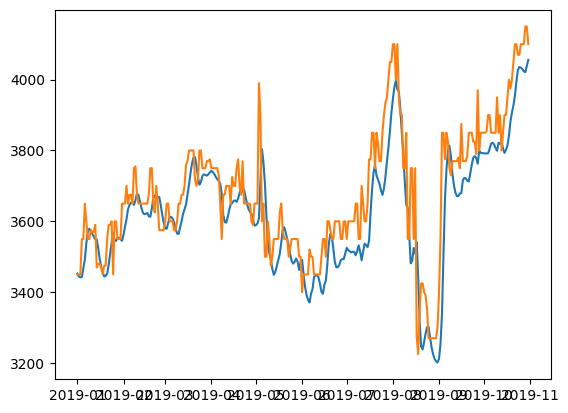

In [19]:
import matplotlib.pyplot as plt
plt.plot(test['Date'][0:304],y_pred_scaled.reshape(-1))
plt.plot(test['Date'][0:304],y_test_scaled.reshape(-1))

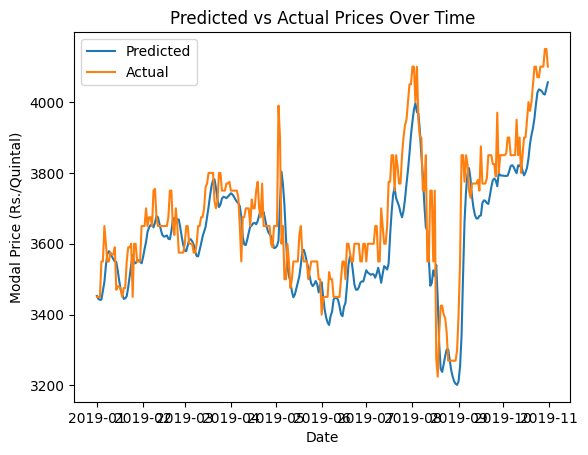

In [20]:

# Define the date range for plotting
date_range = test['Date'].iloc[:len(y_pred_scaled)]

# Plot the predictions against the actual values over time
plt.plot(date_range, y_pred_scaled, label='Predicted')
plt.plot(date_range, y_test_scaled, label='Actual')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time')
plt.legend()

# Show plot
plt.show()

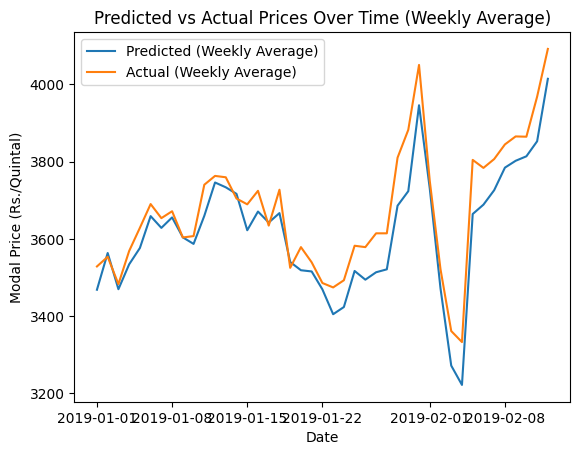

In [21]:
# Define the number of days in a week
days_in_week = 7
num_weeks = len(y_pred_scaled) // days_in_week

# Reshape the predictions and true values to weekly data
y_pred_weekly = y_pred_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)
y_test_weekly = y_test_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)


# Plot the weekly average predictions against the actual values
plt.plot(test['Date'][:len(y_pred_weekly)], y_pred_weekly, label='Predicted (Weekly Average)')
plt.plot(test['Date'][:len(y_test_weekly)], y_test_weekly, label='Actual (Weekly Average)')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time (Weekly Average)')
plt.legend()
plt.savefig("static/my_plot1.png")
# Show plot
plt.show()

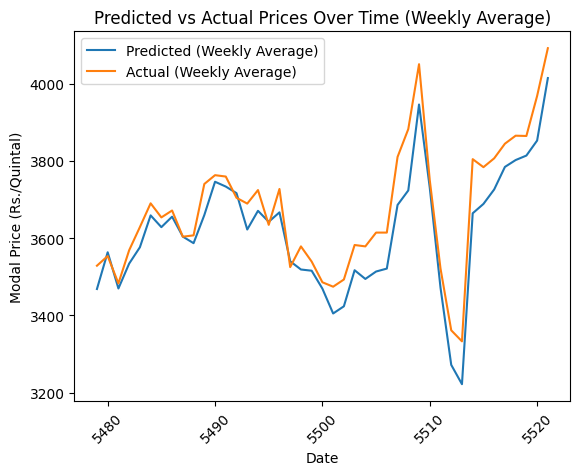

In [22]:

# Define the number of days in a week
days_in_week = 7
num_weeks = len(y_pred_scaled) // days_in_week

# Reshape the predictions and true values to weekly data
y_pred_weekly = y_pred_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)
y_test_weekly = y_test_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)

# Plot the weekly average predictions against the actual values
plt.plot(test.index[:len(y_pred_weekly)], y_pred_weekly, label='Predicted (Weekly Average)')
plt.plot(test.index[:len(y_test_weekly)], y_test_weekly, label='Actual (Weekly Average)')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time (Weekly Average)')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.savefig('static/my_plot.png')
# Show plot
plt.show()

In [23]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import row, column
from bokeh.models.widgets import TextInput
from bokeh.models import CustomJS

# Define Bokeh plots
plot1 = figure(title="Predicted vs Actual Prices Over Time",
               x_axis_label='Date',
               y_axis_label='Modal Price (Rs./Quintal)',
               x_axis_type='datetime')

plot2 = figure(title="Predicted vs Actual Prices Over Time (Weekly Average)",
               x_axis_label='Date',
               y_axis_label='Modal Price (Rs./Quintal)',
               x_axis_type='datetime')

# Add data to plots
source1 = ColumnDataSource(data=dict(date=test['Date'][:len(y_pred_scaled)],
                                     predicted=y_pred_scaled.reshape(-1),
                                     actual=y_test_scaled.reshape(-1)))
plot1.line(x='date', y='predicted', source=source1, legend_label='Predicted', color='blue')
plot1.line(x='date', y='actual', source=source1, legend_label='Actual', color='orange')

source2 = ColumnDataSource(data=dict(date=test['Date'][:len(y_pred_weekly)],
                                     predicted_weekly=y_pred_weekly,
                                     actual_weekly=y_test_weekly))
plot2.line(x='date', y='predicted_weekly', source=source2, legend_label='Predicted (Weekly Average)', color='blue')
plot2.line(x='date', y='actual_weekly', source=source2, legend_label='Actual (Weekly Average)', color='orange')

# Add hover tooltips
hover_tool1 = HoverTool(tooltips=[("Date", "@date{%F}"), ("Predicted", "@predicted"), ("Actual", "@actual")],
                        formatters={"@date": "datetime"})
plot1.add_tools(hover_tool1)

hover_tool2 = HoverTool(tooltips=[("Date", "@date{%F}"), ("Predicted", "@predicted_weekly"), ("Actual", "@actual_weekly")],
                        formatters={"@date": "datetime"})
plot2.add_tools(hover_tool2)

# Define dashboard layout
dashboard_layout = column(plot1, plot2)

# Save and show the dashboard
output_file("index.html")
show(dashboard_layout)
